In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [16]:
data = pd.read_csv('./diamond/diam.csv')

In [24]:
data.tail()

,carat,cut,color,clarity,depth,table,x,y,z,target
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,dewevo
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,dewevo
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,dewevo
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,dewevo
53939,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,dewevo


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
target     53940 non-null object
dtypes: float64(6), object(4)
memory usage: 4.1+ MB


In [26]:
pd.get_dummies(data)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,target_dewevo,target_dorogo
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0.24,62.8,57.0,3.94,3.96,2.48,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0.24,62.3,57.0,3.95,3.98,2.47,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,0.26,61.9,55.0,4.07,4.11,2.53,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,0.22,65.1,61.0,3.87,3.78,2.49,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,0.23,59.4,61.0,4.00,4.05,2.39,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


,carat,depth,table,x,y,z
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


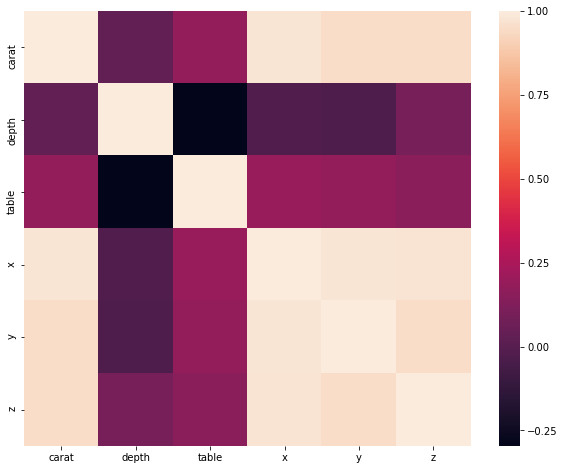

In [27]:
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
corr_matrix

In [29]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           3.83e-62
Time:                        22:47:28   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0